# Car price prediction

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# EDA and data pre-processing

In [2]:
car = pd.read_csv('CarPrice_Assignment (1).csv')
car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
pd.set_option('display.max_columns', None)
car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
car.shape

(205, 26)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
car.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
car['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [10]:
# Splitting company name from CarName column

Brand = car['CarName'].apply(lambda x : x.split(' ')[0])
car.insert(3,"Brand",Brand)
car.drop(['CarName'],axis=1,inplace=True)
car.head()

,car_ID,symboling,Brand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
car.Brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [12]:
def replace_name(a,b):
    car.Brand.replace(a,b,inplace=True)

replace_name('alfa-romero','alfa-romeo')
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')
replace_name('Nissan','nissan')

car.Brand.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [13]:
car.columns

Index(['car_ID', 'symboling', 'Brand', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [14]:
# Adding a new field - fuel economy

car['fueleconomy'] = (0.55*car['citympg'])+(0.45*car['highwaympg'])

In [15]:
car['price'] = car['price'].astype('int')

In [16]:
temp = car.copy()
table = temp.groupby(['Brand'])['price'].mean()
table.reset_index()

,Brand,price
0,alfa-romeo,15498.333333
1,audi,17859.142857
2,bmw,26118.750000
3,buick,33647.000000
4,chevrolet,6007.000000
5,dodge,7875.444444
6,honda,8184.692308
7,isuzu,8916.250000
8,jaguar,34600.000000
9,mazda,10652.882353


In [17]:
car['price'] = car['price'].astype('int')
temp = car.copy()
table = temp.groupby(['Brand'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='Brand')
print(temp.head())
bins = [0,10000,20000,40000]  
car_bin=['Budget','Medium','Highend']
car['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=car_bin)
car.head()

   car_ID  symboling       Brand fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romeo      gas        std        two  convertible   
1       2          3  alfa-romeo      gas        std        two  convertible   
2       3          1  alfa-romeo      gas        std        two    hatchback   
3       4          2        audi      gas        std       four        sedan   
4       5          2        audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front       88.6      168.8      64.1       48.8   
1        rwd          front       88.6      168.8      64.1       48.8   
2        rwd          front       94.5      171.2      65.5       52.4   
3        fwd          front       99.8      176.6      66.2       54.3   
4        4wd          front       99.4      176.6      66.4       54.3   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio 

,car_ID,symboling,Brand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


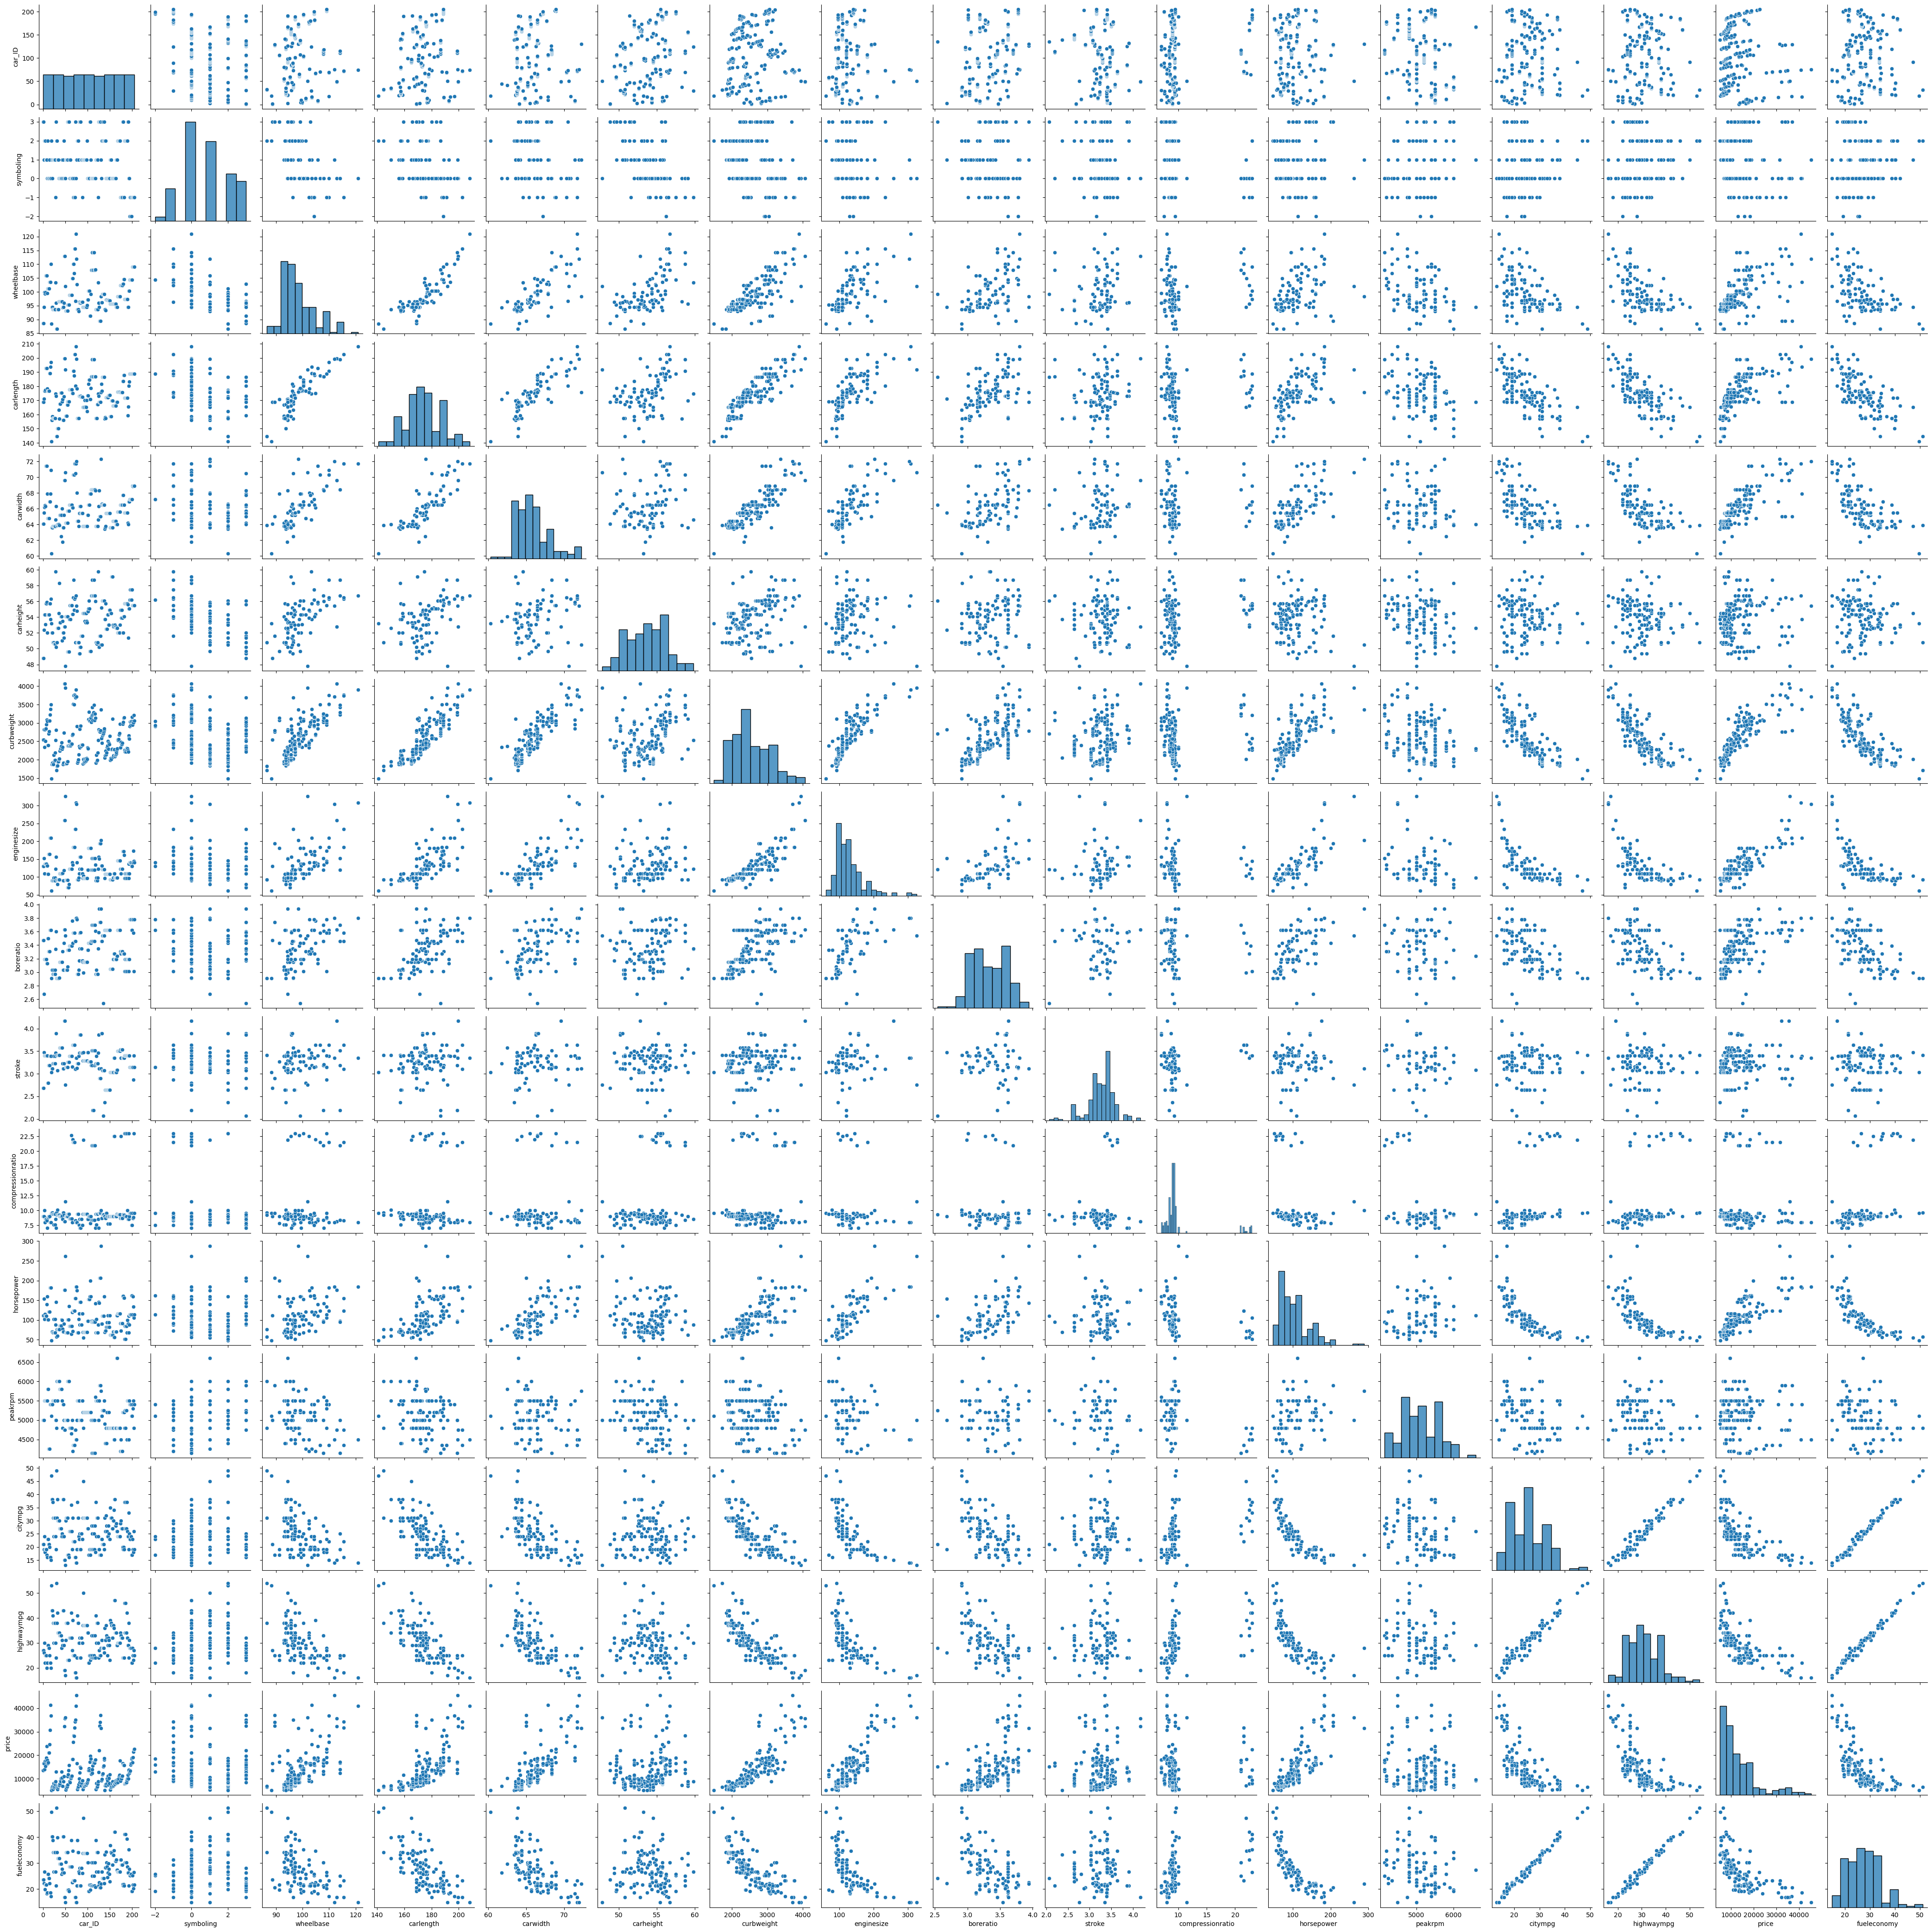

In [18]:
# Creating pairplot

sns.pairplot(car)

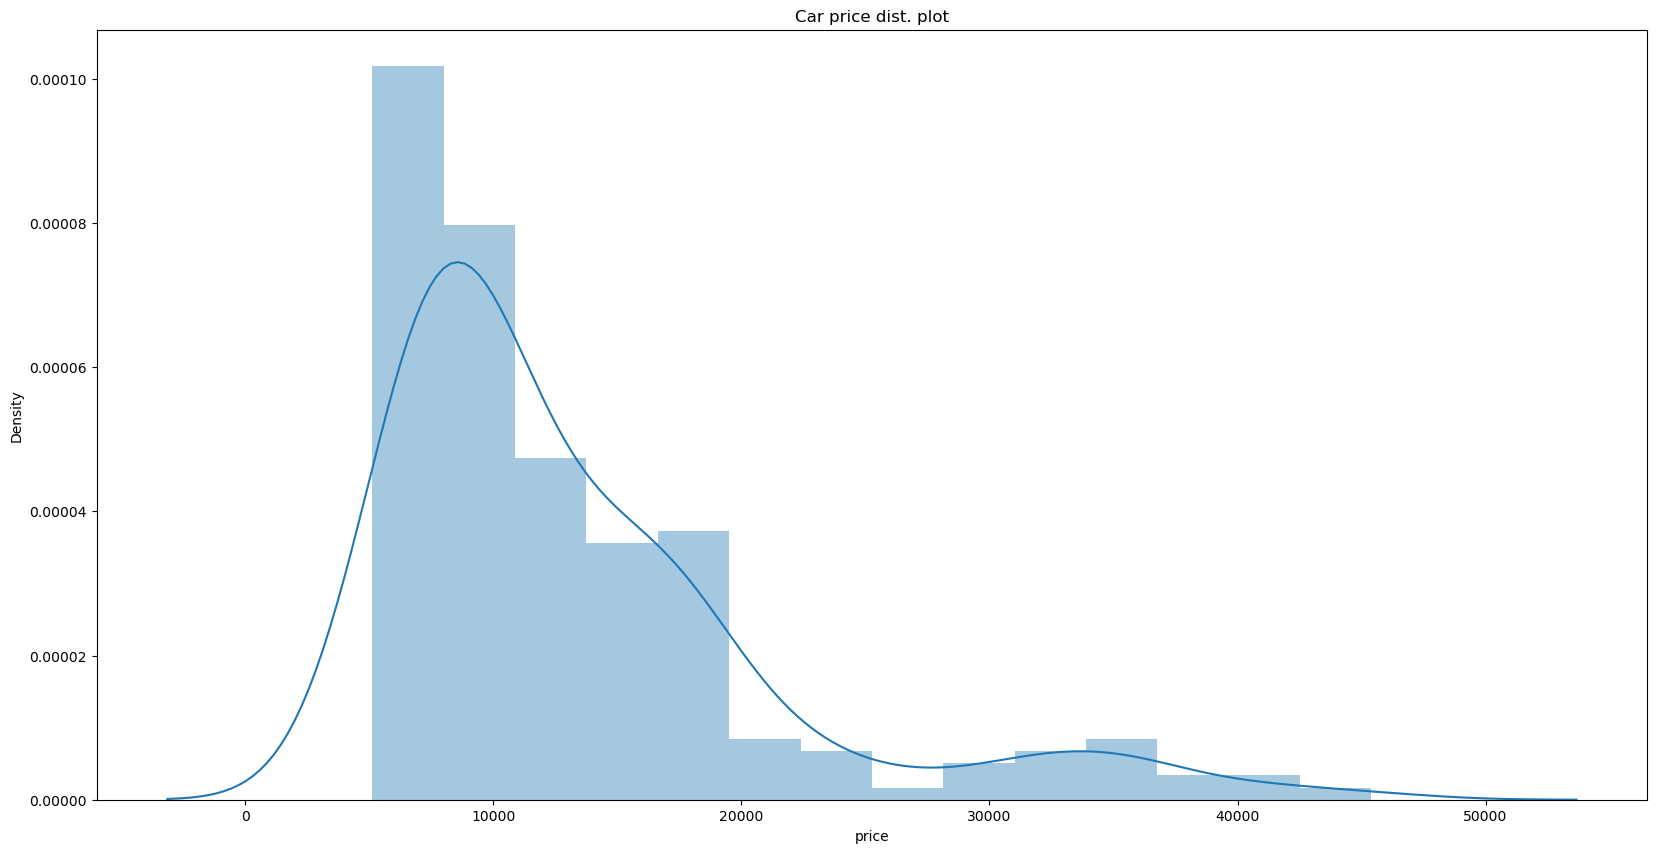

In [19]:
# Car price distribution plot
plt.figure(figsize=(20,10))
plt.title('Car price dist. plot')
sns.distplot(car.price)

plt.show()

The plot shows that most of the cars have prices between 5000 to 20000

[Text(0.5, 0, 'Brand'), Text(0, 0.5, 'Frequency')]

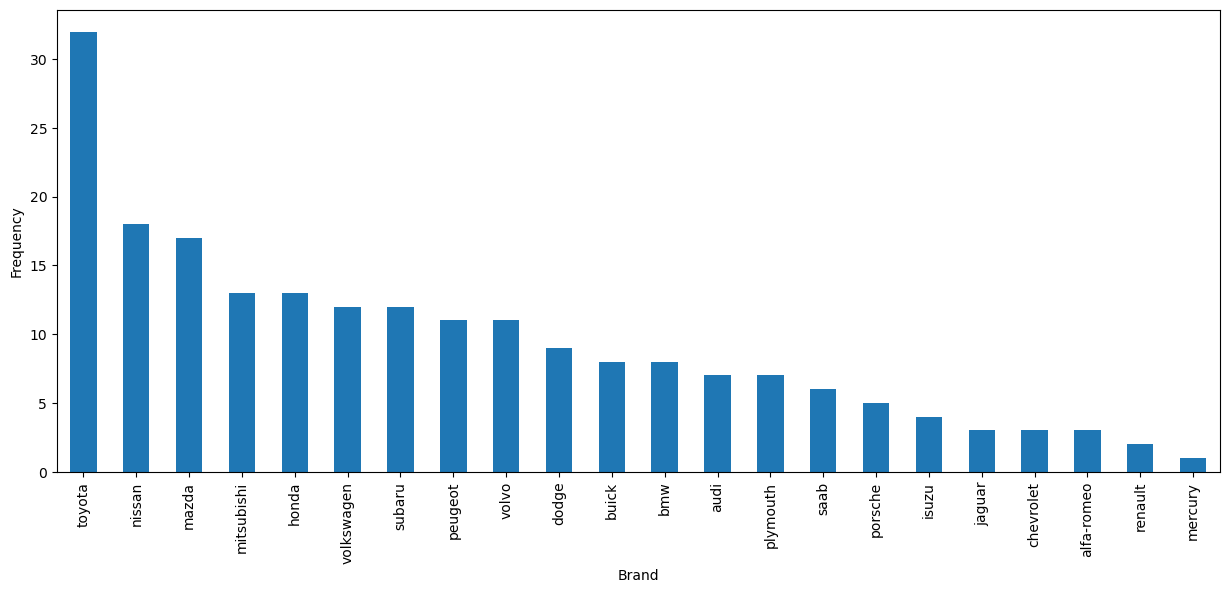

In [20]:
plt.figure(figsize=(15,6))

plt = car.Brand.value_counts().plot(kind='bar')
plt.set(xlabel = 'Brand', ylabel = 'Frequency')

<Axes: xlabel='carsrange', ylabel='fueleconomy'>

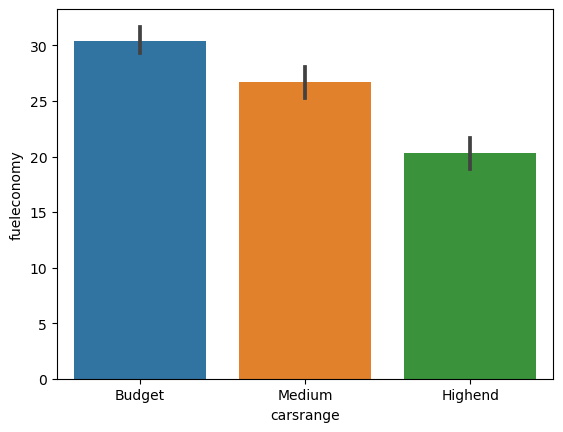

In [21]:
sns.barplot(data=car, x='carsrange',y='fueleconomy')


<Axes: xlabel='enginetype', ylabel='count'>

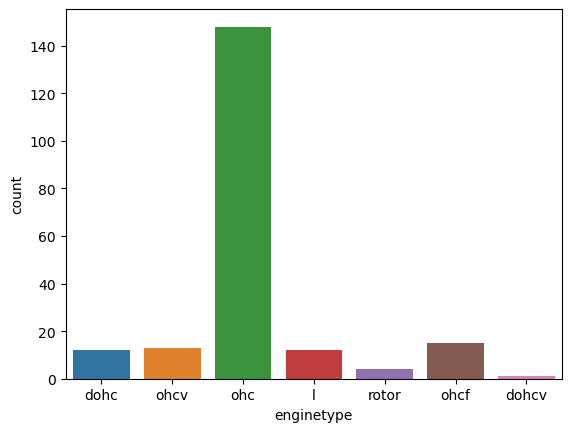

In [22]:

sns.countplot(x=car["enginetype"])

# Finding Features with Correlations

In [23]:
cor = car.corr()
cor

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093,0.013872
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978,-0.003257
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816,-0.508136
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682921,-0.691472
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325,-0.663419
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119337,-0.076356
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305,-0.781535
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145,-0.669464
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553174,-0.589898
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443,-0.043281


In [24]:
# finding the fields with high correlation

correlated_features = set()
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) > 0.6:
            colname1 = cor.columns[i]
            colname2 = cor.columns[j]
            print(abs(cor.iloc[i,j]),"--", i, '--', j, '--', colname1,'--',colname2)
            correlated_features.add(colname1)
            correlated_features.add(colname2)
    

0.874587475964264 -- 3 -- 2 -- carlength -- wheelbase
0.795143643616968 -- 4 -- 2 -- carwidth -- wheelbase
0.8411182684818453 -- 4 -- 3 -- carwidth -- carlength
0.7763863277822105 -- 6 -- 2 -- curbweight -- wheelbase
0.8777284608306433 -- 6 -- 3 -- curbweight -- carlength
0.8670324646791233 -- 6 -- 4 -- curbweight -- carwidth
0.6833598726519026 -- 7 -- 3 -- enginesize -- carlength
0.7354334047796364 -- 7 -- 4 -- enginesize -- carwidth
0.850594073426277 -- 7 -- 6 -- enginesize -- curbweight
0.6064543579849689 -- 8 -- 3 -- boreratio -- carlength
0.648479748701071 -- 8 -- 6 -- boreratio -- curbweight
0.6407320755722926 -- 11 -- 4 -- horsepower -- carwidth
0.7507392514434825 -- 11 -- 6 -- horsepower -- curbweight
0.8097686545377302 -- 11 -- 7 -- horsepower -- enginesize
0.6709086615585719 -- 13 -- 3 -- citympg -- carlength
0.6427043407108963 -- 13 -- 4 -- citympg -- carwidth
0.757413784505601 -- 13 -- 6 -- citympg -- curbweight
0.6536579163114195 -- 13 -- 7 -- citympg -- enginesize
0.80145

In [25]:
print(correlated_features)

{'citympg', 'carlength', 'highwaympg', 'wheelbase', 'curbweight', 'boreratio', 'fueleconomy', 'carwidth', 'horsepower', 'enginesize', 'price'}


In [26]:
hcor = car[correlated_features].corr()
hcor

,citympg,carlength,highwaympg,wheelbase,curbweight,boreratio,fueleconomy,carwidth,horsepower,enginesize,price
citympg,1.000000,-0.670909,0.971337,-0.470414,-0.757414,-0.584532,0.993844,-0.642704,-0.801456,-0.653658,-0.685752
carlength,-0.670909,1.000000,-0.704662,0.874587,0.877728,0.606454,-0.691472,0.841118,0.552623,0.683360,0.682921
highwaympg,0.971337,-0.704662,1.000000,-0.544082,-0.797465,-0.587012,0.991692,-0.677218,-0.770544,-0.677470,-0.697600
wheelbase,-0.470414,0.874587,-0.544082,1.000000,0.776386,0.488750,-0.508136,0.795144,0.353294,0.569329,0.577816
curbweight,-0.757414,0.877728,-0.797465,0.776386,1.000000,0.648480,-0.781535,0.867032,0.750739,0.850594,0.835305
boreratio,-0.584532,0.606454,-0.587012,0.488750,0.648480,1.000000,-0.589898,0.559150,0.573677,0.583774,0.553174
fueleconomy,0.993844,-0.691472,0.991692,-0.508136,-0.781535,-0.589898,1.000000,-0.663419,-0.792822,-0.669464,-0.696214
carwidth,-0.642704,0.841118,-0.677218,0.795144,0.867032,0.559150,-0.663419,1.000000,0.640732,0.735433,0.759325
horsepower,-0.801456,0.552623,-0.770544,0.353294,0.750739,0.573677,-0.792822,0.640732,1.000000,0.809769,0.808138
enginesize,-0.653658,0.683360,-0.677470,0.569329,0.850594,0.583774,-0.669464,0.735433,0.809769,1.000000,0.874145


<Axes: >

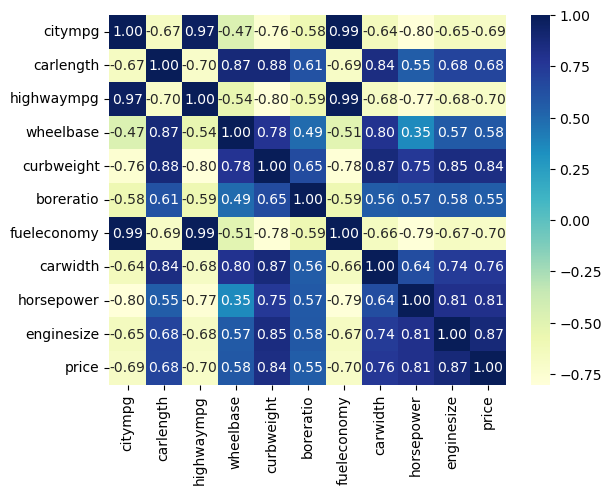

In [27]:
# Producing heatmap
from matplotlib.pyplot import*
sns.heatmap(hcor, annot = True, fmt=".2f", cmap='YlGnBu')

# Creating dummy variables

In [28]:
print(car['fueltype'].unique())
print(car['aspiration'].unique())
print(car['carbody'].unique())
print(car['drivewheel'].unique())
print(car['enginetype'].unique())
print(car['cylindernumber'].unique())
print(car['carsrange'].unique())
print(car['fuelsystem'].unique())
print(car['Brand'].unique())
print(car['doornumber'].unique())
print(car['enginelocation'].unique())

['gas' 'diesel']
['std' 'turbo']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['Medium', 'Highend', 'Budget']
Categories (3, object): ['Budget' < 'Medium' < 'Highend']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
['alfa-romeo' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
['two' 'four']
['front' 'rear']


In [105]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

# Applying the function to the cars_lr

car_lr = car
car_lr = dummies('fueltype',car_lr)
car_lr = dummies('aspiration',car_lr)
car_lr = dummies('carbody',car_lr)
car_lr = dummies('drivewheel',car_lr)
car_lr = dummies('enginetype',car_lr)
car_lr = dummies('cylindernumber',car_lr)
car_lr = dummies('carsrange',car_lr)
car_lr = dummies('Brand',car_lr)
car_lr = dummies('doornumber',car_lr)
car_lr = dummies('enginelocation',car_lr)
car_lr = dummies('fuelsystem',car_lr)

In [106]:
car_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 69 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   enginesize        205 non-null    int64  
 8   boreratio         205 non-null    float64
 9   stroke            205 non-null    float64
 10  compressionratio  205 non-null    float64
 11  horsepower        205 non-null    int64  
 12  peakrpm           205 non-null    int64  
 13  citympg           205 non-null    int64  
 14  highwaympg        205 non-null    int64  
 15  price             205 non-null    int32  
 16  fueleconomy       205 non-null    float64
 1

In [107]:
car_lr.shape

(205, 69)

# Train-test split and feature scaling

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
np.random.seed(0)
df_train, df_test = train_test_split(car_lr, train_size = 0.7, test_size=0.3, random_state=100)

In [110]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars=['wheelbase', 'carheight', 'stroke', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_test[num_vars]= scaler.fit_transform(df_test[num_vars])

In [111]:
df_train.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,two,rear,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,123,1,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,9.4,0.083333,5500,31,38,0.068818,0.530864,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
125,126,3,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,9.5,0.395833,5500,19,27,0.466890,0.213992,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
166,167,1,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,9.4,0.266667,6600,26,29,0.122110,0.344307,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
1,2,3,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,9.0,0.262500,5000,21,27,0.314446,0.244170,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
199,200,-1,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,7.5,0.475000,5100,17,22,0.382131,0.122085,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [112]:
df_test.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,two,rear,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
160,161,0,0.265306,0.341732,0.200000,0.346154,0.132148,0.082969,0.515873,0.524590,9.0,0.116129,4800,38,47,0.058474,1.000000,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
186,187,2,0.311953,0.426772,0.315789,0.605769,0.219125,0.131004,0.515873,0.726776,9.0,0.212903,5250,27,34,0.077398,0.561694,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
59,60,1,0.355685,0.522835,0.421053,0.413462,0.271985,0.187773,0.674603,0.721311,8.6,0.206452,4800,26,32,0.086148,0.508287,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
165,166,1,0.230321,0.379528,0.157895,0.307692,0.214320,0.082969,0.555556,0.551913,9.4,0.387097,6600,26,29,0.097473,0.458564,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
140,141,2,0.195335,0.200000,0.136842,0.605769,0.202307,0.126638,0.857143,0.311475,8.7,0.135484,4400,26,31,0.055099,0.491713,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0


In [113]:
df_train.shape

(143, 69)

In [114]:
df_test.shape

(62, 69)

In [115]:
# Dividing into X and y variables

X_train=df_train.drop(["price"],axis=1)
y_train=df_train['price']

X_train.shape

(143, 68)

In [116]:
y_train.shape

(143,)

In [117]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [118]:
def build_model(X,y):
    X = sm.add_constant(X) 
    lm = sm.OLS(y,X).fit() 
    print(lm.summary())    
    return lm

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features']= X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

# Model Training

In [119]:
model1 = build_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     57.58
Date:                Thu, 04 May 2023   Prob (F-statistic):           3.34e-49
Time:                        20:48:34   Log-Likelihood:                 282.04
No. Observations:                 143   AIC:                            -446.1
Df Residuals:                      84   BIC:                            -271.3
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.4193      0.205  

In [120]:
X_train1 = X_train.drop(
['car_ID', 'wheelbase', 'carlength', 'compressionratio', 'horsepower', 'citympg', 'highwaympg', 'hardtop',
 'sedan','wagon','fwd','rwd','dohcv','l','ohc','ohcf','ohcv','six','Medium',
'audi','buick','chevrolet','dodge','honda','isuzu','jaguar','mazda','nissan','porsche','renault','saab',
 'subaru','toyota','volkswagen','volvo','two','2bbl','4bbl','idi','mfi','mpfi','spdi'], axis=1)

In [121]:
# Recreating model after dropping the columns with P>0.05

model2 = build_model(X_train1, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     111.3
Date:                Thu, 04 May 2023   Prob (F-statistic):           2.01e-69
Time:                        20:48:35   Log-Likelihood:                 239.59
No. Observations:                 143   AIC:                            -431.2
Df Residuals:                     119   BIC:                            -360.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.4296      0.103     -4.165      

In [122]:
#Using RFE for feature elimination

lm = LinearRegression()
lm.fit(X_train1,y_train)
rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)
rfe = rfe.fit(X_train1, y_train)
dir(rfe)


['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_fit',
 '_get_param_names',
 '_get_support_mask',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_sklearn_auto_wrap_output_keys',
 '_transform',
 '_validate_data',
 '_validate_params',
 'classes_',
 'decision_function',
 'estimator',
 'estimator_',
 'feature_names_in_',
 'fit',
 'fit_transform',
 'get_feature_names_out',
 'get_params',
 'get_support',
 'importance_getter'

In [123]:
rfe.support_

array([False,  True, False,  True,  True,  True, False, False, False,
       False, False, False,  True, False, False,  True,  True,  True,
        True, False, False, False, False,  True, False])

In [124]:
X_train1.columns[rfe.support_]

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'rotor', 'three',
       'twelve', 'Highend', 'bmw', 'rear'],
      dtype='object')

In [125]:
X_train_rfe=X_train1[X_train1.columns[rfe.support_]]
X_train_rfe.head()

,carwidth,curbweight,enginesize,boreratio,rotor,three,twelve,Highend,bmw,rear
122,0.291667,0.272692,0.139623,0.230159,0,0,0,0,0,0
125,0.666667,0.500388,0.339623,1.000000,0,0,0,1,0,0
166,0.308333,0.314973,0.139623,0.444444,0,0,0,0,0,0
1,0.316667,0.411171,0.260377,0.626984,0,0,0,0,0,0
199,0.575000,0.647401,0.260377,0.746032,0,0,0,0,0,0


In [126]:

model3 = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     164.6
Date:                Thu, 04 May 2023   Prob (F-statistic):           1.94e-69
Time:                        20:48:36   Log-Likelihood:                 202.89
No. Observations:                 143   AIC:                            -383.8
Df Residuals:                     132   BIC:                            -351.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1329      0.018     -7.455      0.0

In [127]:
X_train2 = X_train_rfe.drop(["twelve"], axis = 1)

In [128]:
model4 = build_model(X_train2,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     183.2
Date:                Thu, 04 May 2023   Prob (F-statistic):           1.99e-70
Time:                        20:48:36   Log-Likelihood:                 202.50
No. Observations:                 143   AIC:                            -385.0
Df Residuals:                     133   BIC:                            -355.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1323      0.018     -7.435      0.0

In [129]:
checkVIF(X_train2)

,Features,VIF
1,curbweight,36.76
0,carwidth,24.73
2,enginesize,21.86
3,boreratio,9.95
6,Highend,3.09
7,bmw,1.69
4,rotor,1.23
8,rear,1.19
5,three,1.01


In [130]:
# Dropping carwidth because of high VIF
X_train3 = X_train2.drop(['curbweight'], axis = 1)

In [131]:
model5 = build_model(X_train3,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     178.4
Date:                Thu, 04 May 2023   Prob (F-statistic):           1.50e-67
Time:                        20:48:37   Log-Likelihood:                 192.51
No. Observations:                 143   AIC:                            -367.0
Df Residuals:                     134   BIC:                            -340.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1504      0.019     -8.127      0.0

# testing the model

In [132]:
checkVIF(X_train3)

,Features,VIF
0,carwidth,16.71
1,enginesize,13.78
2,boreratio,9.74
5,Highend,3.08
6,bmw,1.69
7,rear,1.19
3,rotor,1.18
4,three,1.01


In [133]:
X_train4 = X_train3.drop(['boreratio' ],axis=1)

In [134]:
model6 = build_model(X_train4, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     202.9
Date:                Thu, 04 May 2023   Prob (F-statistic):           2.15e-68
Time:                        20:48:37   Log-Likelihood:                 191.71
No. Observations:                 143   AIC:                            -367.4
Df Residuals:                     135   BIC:                            -343.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1584      0.017     -9.125      0.0

In [135]:
checkVIF(X_train4)

,Features,VIF
1,enginesize,13.36
0,carwidth,10.75
4,Highend,2.92
5,bmw,1.64
2,rotor,1.17
6,rear,1.12
3,three,1.00


In [136]:
num_vars=['wheelbase', 'carheight', 'stroke', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_test[num_vars]= scaler.fit_transform(df_test[num_vars])

In [137]:
X_test=df_test.drop(["price"],axis=1)
y_test=df_test['price']


In [138]:
X_test.shape

(62, 68)

In [139]:
y_test.shape

(62,)

In [140]:
X_train4.shape

(143, 7)

In [141]:
X_test1 = X_test[X_train4.columns]

In [142]:
X_test1.shape

(62, 7)

In [143]:
X_test1 = sm.add_constant(X_test1)

In [148]:
y_pred = model6.predict(X_test1)
y_pred

160   -0.020320
186    0.059626
59     0.139555
165   -0.039723
140   -0.025255
         ...   
28     0.047389
29     0.212031
182    0.030622
40    -0.083482
128    0.739629
Length: 62, dtype: float64

In [149]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8562606764099941

In [150]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

In [151]:
car.columns

Index(['car_ID', 'symboling', 'Brand', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'fueleconomy', 'carsrange'],
      dtype='object')

In [152]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import*

In [153]:
Ranfor = RandomForestRegressor(n_estimators=50, random_state=0)

In [154]:
model = Ranfor.fit(X_test, y_test)

In [155]:
y_pred = Ranfor.predict(X_test)

In [156]:
print("R2 score:", r2_score(y_test, y_pred))

R2 score: 0.9833513371061321


In [157]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

0.01775177394758678

In [158]:
MSE = mean_squared_error(y_test, y_pred)
MSE

0.0007286453295079581

In [159]:
import math
RMSE = math.sqrt(MSE)
RMSE

0.026993431228874147

In [160]:
# Making function for more models 

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  AdaBoostRegressor
from xgboost import XGBRegressor

In [161]:
train_score = []
test_score =[]

def pred_mod(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    i = r2_score(y_train, y_pred)
    j = r2_score(y_test, y_pred_test)
    
    train_score.append(i)
    test_score.append(j)
    
    
    print(f"r2_score of {model} model on training data:",i)
    print(f"r2_score of {model} model on testing data:",j)

In [162]:
pred_mod(DecisionTreeRegressor())

r2_score of DecisionTreeRegressor() model on training data: 1.0
r2_score of DecisionTreeRegressor() model on testing data: 0.851034634016776


In [163]:
pred_mod(AdaBoostRegressor())

r2_score of AdaBoostRegressor() model on training data: 0.9678478832778925
r2_score of AdaBoostRegressor() model on testing data: 0.8771616149237522


In [164]:
car_lr.keys().value_counts()

two           2
car_ID        1
dodge         1
mitsubishi    1
mercury       1
             ..
ohcf          1
ohcv          1
rotor         1
five          1
spfi          1
Length: 68, dtype: int64

In [169]:
car_lr.drop('two', axis=1, inplace=True)

KeyError: "['two'] not found in axis"

In [168]:
pred_mod(XGBRegressor())

ValueError: feature_names must be unique

In [172]:
Al = ["Decision Tree","Ada Boost"]
df = pd.DataFrame({"Algorithms":Al,"Training Score":train_score,"Testing Score":test_score})
df

,Algorithms,Training Score,Testing Score
0,Decision Tree,1.000000,0.851035
1,Ada Boost,0.967848,0.877162


AttributeError: 'Axes' object has no attribute 'show'

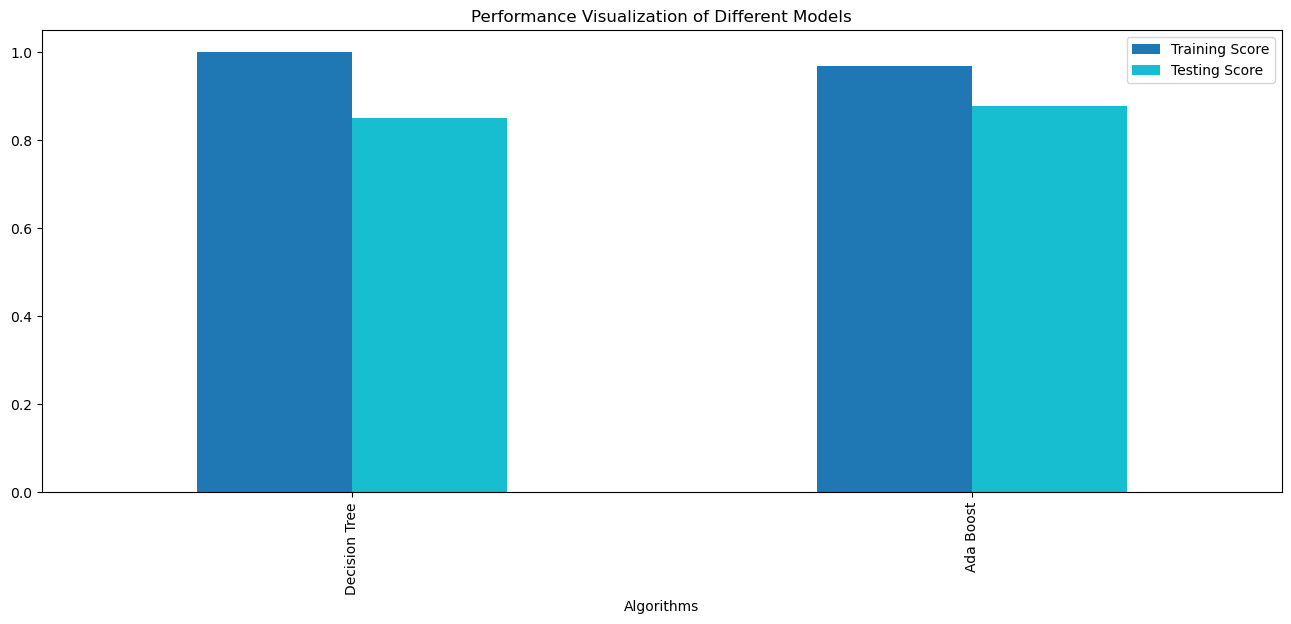

In [177]:
df.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind='bar',title="Performance Visualization of Different Models",colormap="tab10")
plt.show()